In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("201672_2018.csv", header=None)

In [3]:
data = pd.DataFrame(data)
data.head()

,0,1,2
0,2018-01-09 23:59:59,8819600,Выдача наличных денежных средств по УС 201672 ...
1,2018-01-10 23:59:59,4180500,Выдача наличных денежных средств по УС 201672 ...
2,2018-01-15 23:59:59,5396600,Выдача наличных денежных средств по УС 201672 ...
3,2018-01-17 23:59:59,6309000,Выдача наличных денежных средств по УС 201672 ...
4,2018-01-21 23:59:59,5353900,Выдача наличных денежных средств по УС 201672 ...


In [4]:
data = data.rename(columns = {0:"data", 1:"cash", 2:"period"})
data.head()

,data,cash,period
0,2018-01-09 23:59:59,8819600,Выдача наличных денежных средств по УС 201672 ...
1,2018-01-10 23:59:59,4180500,Выдача наличных денежных средств по УС 201672 ...
2,2018-01-15 23:59:59,5396600,Выдача наличных денежных средств по УС 201672 ...
3,2018-01-17 23:59:59,6309000,Выдача наличных денежных средств по УС 201672 ...
4,2018-01-21 23:59:59,5353900,Выдача наличных денежных средств по УС 201672 ...


In [5]:
import re

In [6]:
data.dtypes

data      object
cash       int64
period    object
dtype: object

In [7]:
pattern = r"[\d\.]+"
pattern_2 = r"[\.]+"
bank = []
for i in range(data.period.size):
    link = re.findall(pattern, data.period[i])
    link_bank = []
    for i in link:
        i = re.sub(pattern_2, "/", i)
        link_bank.append(i)
    bank.append(link_bank)

bank = pd.DataFrame(bank, columns = ["bank", "data_1", "data_2"])
bank.head()

,bank,data_1,data_2
0,201672,29/12/2017,09/01/2018
1,201672,09/01/2018,10/01/2018
2,201672,10/01/2018,15/01/2018
3,201672,15/01/2018,17/01/2018
4,201672,17/01/2018,21/01/2018


In [8]:
data.drop(['period', 'data'], axis='columns', inplace=True)
data.head()

,cash
0,8819600
1,4180500
2,5396600
3,6309000
4,5353900


In [9]:
bank.drop(['bank'], axis='columns', inplace=True)
bank.head()

,data_1,data_2
0,29/12/2017,09/01/2018
1,09/01/2018,10/01/2018
2,10/01/2018,15/01/2018
3,15/01/2018,17/01/2018
4,17/01/2018,21/01/2018


In [10]:
data.shape

(163, 1)

In [11]:
bank.shape

(163, 2)

In [12]:
df = pd.concat((bank, data),axis=1)

In [13]:
df.head()

,data_1,data_2,cash
0,29/12/2017,09/01/2018,8819600
1,09/01/2018,10/01/2018,4180500
2,10/01/2018,15/01/2018,5396600
3,15/01/2018,17/01/2018,6309000
4,17/01/2018,21/01/2018,5353900


In [14]:
df.dtypes

data_1    object
data_2    object
cash       int64
dtype: object

In [15]:
df['data_1'] = pd.to_datetime(df['data_1'], format="%d/%m/%Y")
df['data_2'] = pd.to_datetime(df['data_2'], format="%d/%m/%Y")
df.dtypes

data_1    datetime64[ns]
data_2    datetime64[ns]
cash               int64
dtype: object

In [16]:
df.head()

,data_1,data_2,cash
0,2017-12-29,2018-01-09,8819600
1,2018-01-09,2018-01-10,4180500
2,2018-01-10,2018-01-15,5396600
3,2018-01-15,2018-01-17,6309000
4,2018-01-17,2018-01-21,5353900


In [17]:
df.data_2[0]-df.data_1[0]

Timedelta('11 days 00:00:00')

In [18]:
df['colday'] = df.data_2 - df.data_1 

In [19]:
df.head()

,data_1,data_2,cash,colday
0,2017-12-29,2018-01-09,8819600,11 days
1,2018-01-09,2018-01-10,4180500,1 days
2,2018-01-10,2018-01-15,5396600,5 days
3,2018-01-15,2018-01-17,6309000,2 days
4,2018-01-17,2018-01-21,5353900,4 days


In [20]:
df.tail()

,data_1,data_2,cash,colday
158,2018-12-24,2018-12-25,1771500,1 days
159,2018-12-25,2018-12-26,3544500,1 days
160,2018-12-26,2018-12-27,750700,1 days
161,2018-12-27,2018-12-28,3989500,1 days
162,2018-12-28,2018-12-29,1505100,1 days


In [21]:
import datetime

In [22]:

df_days = []
holiday_date = {1:[1,2,3,4,5,6,7,8], 2: [23], 3: [8], 4:[], 5: [1,9], 6: [12],7:[], 8:[], 9:[], 10:[], 11:[4], 12:[]}

for i in range(df.data_1.size):
    start_date = df.data_1[i]
    end_date = df.data_2[i]
    
    weekend = 0
    holiday = 0
    winter = False
    spring = False
    summer = False
    fall = False
    end_or_begin_month = False
    months = set()

    day_count = (end_date - start_date).days

    for single_date in [d for d in (start_date + datetime.timedelta(days=n) for n in range(day_count)) if d <= end_date]: 
        if single_date.strftime("%A") == 'Saturday' or single_date.strftime("%A") == 'Sunday':
            weekend += 1
        month = holiday_date[single_date.month]
        if len(month) != 0:
            for day in month:
                if day == single_date.day:
                    holiday += 1
        if single_date.day < 10 or single_date.day > 25:
            end_or_begin_month = True
        
        months.add(single_date.strftime("%m"))  
        
    for month in months:
        if month == "01" or month == "02" or month == "12":
            winter = True
        elif month == "03" or month == "04" or month == "05":
            spring = True
        elif month == "06" or month == "07" or month == "08":
            summer = True
        elif month == "09" or month == "10" or month == "11":
            fall = True
    
    
    df_day = [day_count, weekend, holiday, winter, spring, summer, fall, end_or_begin_month]
    df_days.append(df_day)

days = pd.DataFrame(df_days, columns = ["day_count", "weekend", "holiday", "winter", "spring", "summer", "fall", "end_or_begin_month"])   


In [23]:
days.shape

(163, 8)

In [24]:
df = pd.concat((df, days),axis=1)

In [25]:
df.head()

,data_1,data_2,cash,colday,day_count,weekend,holiday,winter,spring,summer,fall,end_or_begin_month
0,2017-12-29,2018-01-09,8819600,11 days,11,4,8,True,False,False,False,True
1,2018-01-09,2018-01-10,4180500,1 days,1,0,0,True,False,False,False,True
2,2018-01-10,2018-01-15,5396600,5 days,5,2,0,True,False,False,False,False
3,2018-01-15,2018-01-17,6309000,2 days,2,0,0,True,False,False,False,False
4,2018-01-17,2018-01-21,5353900,4 days,4,1,0,True,False,False,False,False


In [26]:
X = df[["day_count", "weekend", "holiday", "winter", "spring", "summer", "fall", "end_or_begin_month"]]
X.head()

,day_count,weekend,holiday,winter,spring,summer,fall,end_or_begin_month
0,11,4,8,True,False,False,False,True
1,1,0,0,True,False,False,False,True
2,5,2,0,True,False,False,False,False
3,2,0,0,True,False,False,False,False
4,4,1,0,True,False,False,False,False


In [27]:
df_y = df["cash"]
df_y

0      8819600
1      4180500
2      5396600
3      6309000
4      5353900
        ...   
158    1771500
159    3544500
160     750700
161    3989500
162    1505100
Name: cash, Length: 163, dtype: int64

In [28]:
min = df_y.min()
max = df_y.max()
print(min, max)
y = []

for cash in df_y:
    y.append((cash - min)/(max - min))
y = pd.Series(y)

672200 11499900


In [29]:
y.head()

0    0.752459
1    0.324012
2    0.436325
3    0.520591
4    0.432382
dtype: float64

In [30]:
X.dtypes

day_count             int64
weekend               int64
holiday               int64
winter                 bool
spring                 bool
summer                 bool
fall                   bool
end_or_begin_month     bool
dtype: object

In [31]:
X = X.astype('int64')

In [32]:
#min = X["day_count"].min()
#max = X["day_count"].max()
#print(min, max)

#X["day_count"] = (X["day_count"] - min)/(max - min)
#X.head()

In [33]:
#min = X["weekend"].min()
#max = X["weekend"].max()
#print(min, max)

#X["weekend"] = (X["weekend"] - min)/(max - min)
#X.head()

In [34]:
#min = X["holiday"].min()
#max = X["holiday"].max()
#print(min, max)

#X["holiday"] = (X["holiday"] - min)/(max - min)
#X.head()

In [35]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pylab as plt

In [36]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 7.11667317,  4.29992426, 12.18174304, ..., -0.54189556,
        -0.5986095 ,  1.0061539 ],
       [-0.98967013, -0.81604402, -0.13220496, ..., -0.54189556,
        -0.5986095 ,  1.0061539 ],
       [ 2.25286719,  1.74194012, -0.13220496, ..., -0.54189556,
        -0.5986095 , -0.99388373],
       ...,
       [-0.98967013, -0.81604402, -0.13220496, ..., -0.54189556,
        -0.5986095 ,  1.0061539 ],
       [-0.98967013, -0.81604402, -0.13220496, ..., -0.54189556,
        -0.5986095 ,  1.0061539 ],
       [-0.98967013, -0.81604402, -0.13220496, ..., -0.54189556,
        -0.5986095 ,  1.0061539 ]])

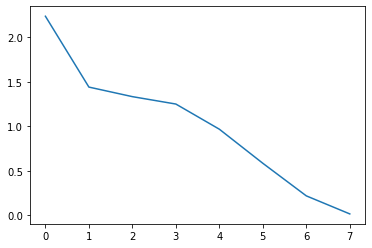

In [37]:
model = PCA() # создание экземпляра класса анализа главных компонент
results = model.fit(X) # применение PCA к свободным переменным для поиска возможности свертки их в меньшее количество переменных

Z = results.transform(X) # результат преобразуется в массив для использования вновь созданных данных

plt.plot(results.explained_variance_) # график объяснимой дисперсии переменных; в данном случае используется график каменной осыпи

In [38]:
Z.shape

(163, 8)

In [39]:
Z

array([[ 1.25616883e+01,  4.85057174e+00,  3.07450079e+00, ...,
         4.79603440e+00,  1.52621433e+00,  3.06333312e-02],
       [-1.25456775e+00,  1.62072009e+00,  1.51440138e-01, ...,
         5.55387160e-02,  7.28251835e-02,  1.06877122e-02],
       [ 1.79118632e+00,  1.77426561e+00,  2.74397003e-01, ...,
        -1.45789878e+00, -1.40350345e+00, -4.98235546e-02],
       ...,
       [-1.25456775e+00,  1.62072009e+00,  1.51440138e-01, ...,
         5.55387160e-02,  7.28251835e-02,  1.06877122e-02],
       [-1.25456775e+00,  1.62072009e+00,  1.51440138e-01, ...,
         5.55387160e-02,  7.28251835e-02,  1.06877122e-02],
       [-1.25456775e+00,  1.62072009e+00,  1.51440138e-01, ...,
         5.55387160e-02,  7.28251835e-02,  1.06877122e-02]])

In [40]:
inf = results.explained_variance_ratio_
table = pd.DataFrame({'Дополнительная информация': inf*100}) # в процентах
table

,Дополнительная информация
0,27.793196
1,17.902506
2,16.568766
3,15.535124
4,12.022573
5,7.266396
6,2.715815
7,0.195624


In [41]:
pd.DataFrame(Z, columns=list(["0", "1", "2", "3", "4", "5", "6", "7"]))

,0,1,2,3,4,5,6,7
0,12.561688,4.850572,3.074501,2.395219,0.137647,4.796034,1.526214,0.030633
1,-1.254568,1.620720,0.151440,-0.248301,-1.304872,0.055539,0.072825,0.010688
2,1.791186,1.774266,0.274397,0.519079,1.279620,-1.457899,-1.403503,-0.049824
3,-1.061013,1.744658,-0.000739,0.096456,0.712506,0.262228,-0.518702,0.012450
4,0.615922,1.755292,0.149181,0.333894,1.037133,-0.571621,-1.274112,-0.031443
...,...,...,...,...,...,...,...,...
158,-1.562683,1.752998,-0.025443,0.044203,0.630365,0.209799,0.107316,0.037963
159,-1.562683,1.752998,-0.025443,0.044203,0.630365,0.209799,0.107316,0.037963
160,-1.254568,1.620720,0.151440,-0.248301,-1.304872,0.055539,0.072825,0.010688
161,-1.254568,1.620720,0.151440,-0.248301,-1.304872,0.055539,0.072825,0.010688


# Данные готовы

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.10, random_state=42)

In [47]:
from sklearn import neural_network
from sklearn.metrics import confusion_matrix
#predicted_correct = [] # массив будет заполнен правильно спрогнозированными наблюдениями

for i in range(1, 10):
    mlp = neural_network.MLPRegressor(hidden_layer_sizes=(64*i, 32*i, 16*i, 8*i),random_state=0, activation='relu') # 8,16,32,16,32
    fit = mlp.fit(X_train, y_train)
    if fit.score(X_test, y_test) > 0:
        print(i, fit.score(X_train, y_train), fit.score(X_test, y_test))

3 0.532202463633783 0.1165345070541316


In [45]:
i = 3
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(i*10, 8*i, 6*i, 4*i),random_state=0, activation='relu')
fit = mlp.fit(X_train, y_train)
if fit.score(X_test, y_test) > 0:
    print(i, fit.score(X_train, y_train), fit.score(X_test, y_test))

3 0.3045800174239085 0.37039026341367515


In [46]:
i = 5
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(i*10, 10*i, 10*i, 10*i, 10*i),random_state=0, activation='relu') # 8,16,32,16,32
fit = mlp.fit(X_train, y_train)
if fit.score(X_test, y_test) > 0:
    print(i, fit.score(X_train, y_train), fit.score(X_test, y_test))

5 0.43421246922675827 0.21324289152401632


In [48]:
fit.score(X_train, y_train)

-0.7171749392320412

In [49]:
mlp.n_iter_

32

In [50]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (30, 24, 18, 12),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [51]:
mlp.loss_

0.016769706502012552

In [52]:
mlp.out_activation_

'identity'

In [53]:
mlp.score(X_test, y_test)

-0.28179630764077435

In [54]:
y_real = []
for y in y_test:
    y_real.append(y)


In [55]:
y_pred = pd.DataFrame(mlp.predict(X_test), columns = ["y_pred"])
y_real = pd.DataFrame(y_real, columns = ["y_real"])
df_y_pred = pd.concat((y_pred, y_real),axis=1)

In [86]:
df_y_pred["difference"] = df_y_pred.y_real - df_y_pred.y_pred

In [87]:
df_y_pred.head()

,y_pred,y_real,difference
0,0.308701,0.574868,0.266167
1,0.328406,0.399069,0.070663
2,0.365465,0.562335,0.196871
3,0.243004,0.310408,0.067404
4,0.160436,0.183797,0.023361


In [88]:
print(df_y_pred.difference.min(), df_y_pred.difference.max())

-0.17958302561958708 0.26616722090036027


In [89]:
min = df_y.min()
max = df_y.max()

df_y_pred["difference"] = df_y_pred.difference*(max-min)+min

In [90]:
df_y_pred

,y_pred,y_real,difference
0,0.308701,0.574868,3.554179e+06
1,0.328406,0.399069,1.437315e+06
2,0.365465,0.562335,2.803860e+06
3,0.243004,0.310408,1.402027e+06
4,0.160436,0.183797,9.251502e+05
5,0.294993,0.130425,-1.109694e+06
6,0.325487,0.145904,-1.272271e+06
7,0.604107,0.643156,1.095008e+06
8,0.290298,0.337172,1.179744e+06
9,0.195264,0.268460,1.464737e+06


In [45]:
df_y_pred.difference.min()

-0.20367559537441698